In [1]:
import pickle

In [3]:
with open ('./data/data_coin_daily.pkl','rb') as handle:
    test = pickle.load(handle)

In [6]:
with open('./data/Raw_Price/price_all.pickle','rb') as handle:
    test1 = pickle.load(handle)

In [4]:
import quantstats as qs
# stock = qs.utils.download_returns('FB')


In [9]:
import FinanceDataReader as fdr
import numpy as np
df_stock = fdr.DataReader('000660',start='20040601')

In [10]:
df_stock.rename(columns={'Open':'open','High':'high','Low':'low','Close':'close','Volume':'volume'}, inplace=True)
df_stock['return'] = np.log10(df_stock.close / df_stock.close.shift(1))
df_stock['date'] = df_stock.index
# data_raw_temp = df_stock

                           Strategy
-------------------------  ----------
Start Period               2004-06-01
End Period                 2022-08-10
Risk-Free Rate             0.0%
Time in Market             96.0%

Cumulative Return          716.0%
CAGR﹪                     12.22%

Sharpe                     0.49
Prob. Sharpe Ratio         98.03%
Smart Sharpe               0.49
Sortino                    0.72
Smart Sortino              0.72
Sortino/√2                 0.51
Smart Sortino/√2           0.51
Omega                      1.09

Max Drawdown               -85.41%
Longest DD Days            2773
Volatility (ann.)          44.42%
Calmar                     0.14
Skew                       0.24
Kurtosis                   3.88

Expected Daily %           0.05%
Expected Monthly %         0.96%
Expected Yearly %          11.68%
Kelly Criterion            4.17%
Risk of Ruin               0.0%
Daily Value-at-Risk        -4.52%
Expected Shortfall (cVaR)  -4.52%

Max Consecutive Wins     

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2006-09-19,2008-11-24,2014-04-23,2773,-85.411471,-82.369077
2,2014-07-09,2016-05-09,2017-01-26,932,-50.385356,-49.325626
3,2021-02-26,2022-07-01,2022-08-10,530,-41.077441,-38.383838
4,2018-05-24,2019-01-03,2019-12-27,582,-39.454355,-37.880378
5,2020-02-18,2020-03-19,2020-12-02,288,-34.285714,-31.619048


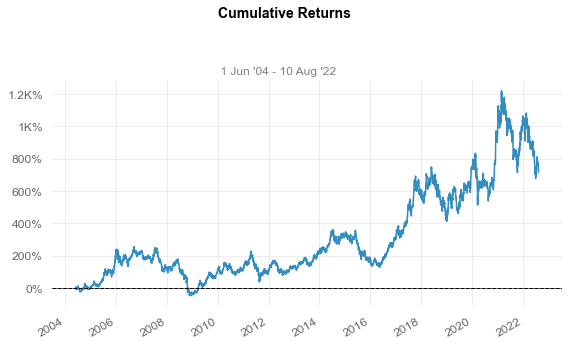

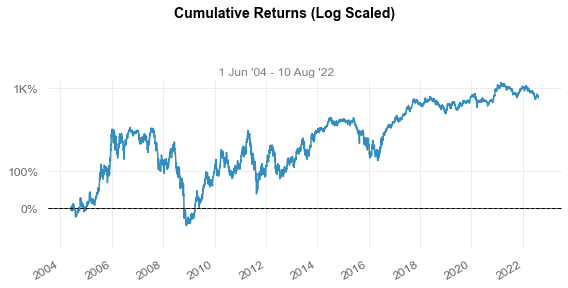

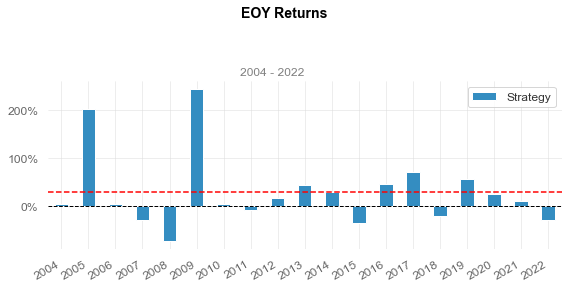

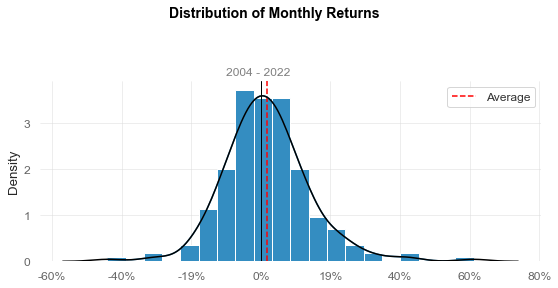

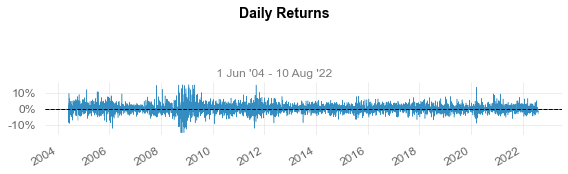

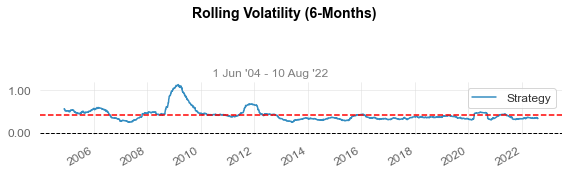

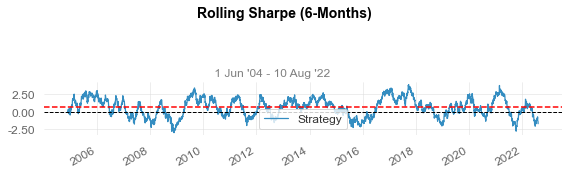

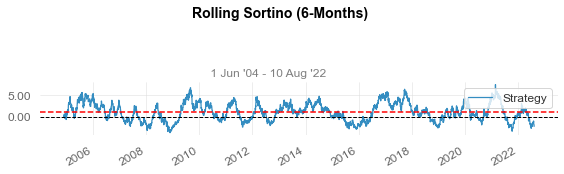

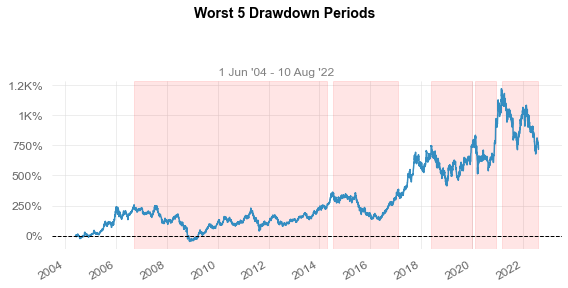

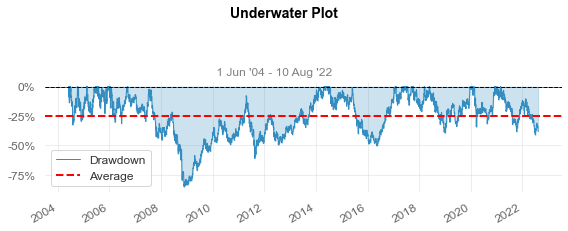

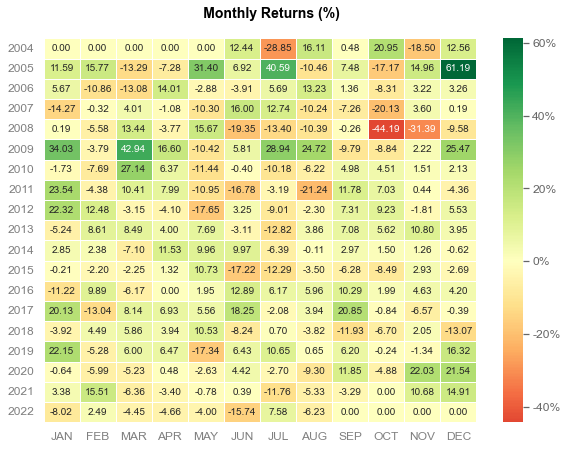

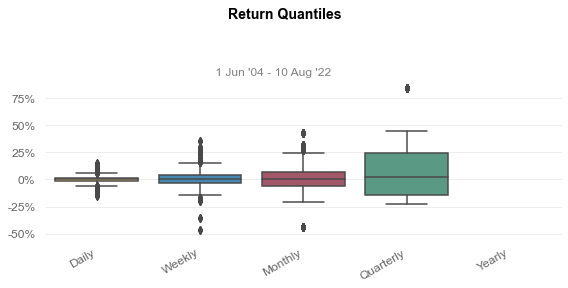

In [10]:
qs.reports.full(df_stock.Change)

In [17]:
trade_status

array([nan, nan, nan, nan, nan, nan, nan, nan, nan,  2.,  2.,  2.,  2.,
        2.,  2., nan, nan, nan, nan, nan,  2.,  2., nan, nan, nan, nan,
       nan, nan, nan, nan,  1.,  1., nan,  1.,  1.,  1., nan, nan, nan,
       nan,  2.,  2.,  2.,  2., nan, nan,  2.,  2.])

In [26]:
data_raw_temp = df_stock.copy()
data_raw_temp['max_days'] = data_raw_temp.close.rolling(20).max()
data_raw_temp['min_days'] = data_raw_temp.close.rolling(10).min()
# # 하나의 numpy에 high>max_days 면 1, low < min_days 면 0, 나머지는 nan. -> fillna위에값 -> 0 에서 1로 바뀌면 매수buy_entry, 1에서 0으로 바뀌면 매도buy_exit, shift활용)
trade_status = np.where( data_raw_temp['high'] >= data_raw_temp['max_days'], 1, np.where( data_raw_temp['low'] <= data_raw_temp['min_days'], 0, np.nan ) ) 
data_raw_temp['trade_status'] = list(trade_status)
# #         data_raw_temp['trade_status'] = data_raw_temp['trade_status'].shift(1)
data_raw_temp['trade_status'] = data_raw_temp['trade_status'].fillna(method='ffill').shift(1)
# data_raw_temp['strategy_return'] = data_raw_temp['return'] * data_raw_temp['trade_status'].shift(1)
# #         trade_status
data_raw_temp['buy_entry'] = np.where( (data_raw_temp.trade_status==1) & (data_raw_temp.trade_status.shift(1) == 0), 1, 0)
# .shift(1)
data_raw_temp['buy_exit'] = np.where( (data_raw_temp.trade_status==0) & (data_raw_temp.trade_status.shift(1) == 1), 1, 0)
data_raw_temp

,open,high,low,close,volume,Change,return,date,max_days,min_days,trade_status,buy_entry,buy_exit
Date,,,,,,,,,,,,,
2022-06-02,106000,107500,106000,107000,3097583,-0.009259,NaN,2022-06-02,NaN,NaN,NaN,0,0
2022-06-03,108000,108500,107000,107000,1638006,0.000000,0.000000,2022-06-03,NaN,NaN,NaN,0,0
2022-06-07,105500,106000,103500,104000,3174521,-0.028037,-0.012350,2022-06-07,NaN,NaN,NaN,0,0
2022-06-08,104500,107500,104500,106000,3075530,0.019231,0.008273,2022-06-08,NaN,NaN,NaN,0,0
2022-06-09,105500,107000,104500,105500,4640744,-0.004717,-0.002053,2022-06-09,NaN,NaN,NaN,0,0
2022-06-10,104000,104500,102500,103500,3480289,-0.018957,-0.008312,2022-06-10,NaN,NaN,NaN,0,0
2022-06-13,100000,101000,99000,99000,4133447,-0.043478,-0.019305,2022-06-13,NaN,NaN,NaN,0,0
2022-06-14,96900,99600,96800,99100,3242550,0.001010,0.000438,2022-06-14,NaN,NaN,NaN,0,0
2022-06-15,98500,98900,96700,97900,2578500,-0.012109,-0.005291,2022-06-15,NaN,NaN,NaN,0,0


In [30]:
calculate_turtle(df_stock)

C:\Users\malko\AppData\Local\Temp/ipykernel_17872/3934820021.py:17: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  self.data_raw = data_raw_temp.copy()


,open,high,low,close,volume,Change,return,date,max_days,min_days,trade_status,strategy_return,buy_entry,buy_exit
Date,,,,,,,,,,,,,,
2022-06-02,106000,107500,106000,107000,3097583,-0.009259,NaN,2022-06-02,NaN,NaN,NaN,NaN,0,0
2022-06-03,108000,108500,107000,107000,1638006,0.000000,0.000000,2022-06-03,NaN,NaN,NaN,NaN,0,0
2022-06-07,105500,106000,103500,104000,3174521,-0.028037,-0.012350,2022-06-07,NaN,NaN,NaN,NaN,0,0
2022-06-08,104500,107500,104500,106000,3075530,0.019231,0.008273,2022-06-08,NaN,NaN,NaN,NaN,0,0
2022-06-09,105500,107000,104500,105500,4640744,-0.004717,-0.002053,2022-06-09,NaN,NaN,NaN,NaN,0,0
2022-06-10,104000,104500,102500,103500,3480289,-0.018957,-0.008312,2022-06-10,NaN,NaN,NaN,NaN,0,0
2022-06-13,100000,101000,99000,99000,4133447,-0.043478,-0.019305,2022-06-13,NaN,NaN,NaN,NaN,0,0
2022-06-14,96900,99600,96800,99100,3242550,0.001010,0.000438,2022-06-14,NaN,NaN,NaN,NaN,0,0
2022-06-15,98500,98900,96700,97900,2578500,-0.012109,-0.005291,2022-06-15,NaN,NaN,NaN,NaN,0,0


In [29]:
def calculate_turtle(self):
    data_raw_temp = self

    data_raw_temp['max_days'] = data_raw_temp.close.rolling(20).max()
    data_raw_temp['min_days'] = data_raw_temp.close.rolling(10).min()

    # 하나의 numpy에 high>max_days 면 1, low < min_days 면 0, 나머지는 nan. -> fillna위에값 -> 0 에서 1로 바뀌면 매수buy_entry, 1에서 0으로 바뀌면 매도buy_exit, shift활용)
    trade_status = np.where( data_raw_temp['high'] >= data_raw_temp['max_days'], 1, np.where( data_raw_temp['low'] <= data_raw_temp['min_days'], 0, np.nan ) ) 
    data_raw_temp['trade_status'] = list(trade_status)
#         data_raw_temp['trade_status'] = data_raw_temp['trade_status'].shift(1)
    data_raw_temp['trade_status'].fillna(method='ffill', inplace=True)
    data_raw_temp['strategy_return'] = data_raw_temp['return'] * data_raw_temp['trade_status'].shift(1)
#         trade_status
    data_raw_temp['buy_entry'] = np.where( (data_raw_temp.trade_status==1) & (data_raw_temp.trade_status.shift(1) == 0), 1, 0)
    data_raw_temp['buy_exit'] = np.where( (data_raw_temp.trade_status==0) & (data_raw_temp.trade_status.shift(1)) == 1, 1, 0)

    self.data_raw = data_raw_temp.copy()
    return data_raw_temp


In [8]:
a.loc['max']= a.Close.rolling(10).max()
a

C:\Users\malko\anaconda3\envs\py38_64\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


,Open,High,Low,Close,Volume,Change,test,max
Date,,,,,,,,
2022-06-24 00:00:00,90500.0,92000.0,90500.0,91600.0,3045970.0,0.015521,NaN,NaN
2022-06-27 00:00:00,92700.0,96100.0,92600.0,95000.0,3408749.0,0.037118,NaN,NaN
2022-06-28 00:00:00,94500.0,95300.0,93700.0,95300.0,2022966.0,0.003158,NaN,NaN
2022-06-29 00:00:00,93300.0,94900.0,92900.0,94000.0,2529973.0,-0.013641,NaN,NaN
2022-06-30 00:00:00,91500.0,93100.0,91000.0,91000.0,3098854.0,-0.031915,NaN,NaN
2022-07-01 00:00:00,91000.0,92500.0,87100.0,87500.0,4959176.0,-0.038462,NaN,NaN
2022-07-04 00:00:00,87500.0,89600.0,86300.0,89100.0,4331728.0,0.018286,NaN,NaN
2022-07-05 00:00:00,90400.0,93400.0,90400.0,92500.0,3560085.0,0.038159,NaN,NaN
2022-07-06 00:00:00,92800.0,93600.0,90900.0,92100.0,3981326.0,-0.004324,NaN,NaN
